In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\EstebanMatéo\AppData\Local\Temp\ipykernel_11924\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib inline
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st
import kagglehub

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

# Lien vers l'application 
https://devlogiciel-8qtkhhpakihjw8wsxqvw5x.streamlit.app/
# Lien GitHub
https://github.com/rateoooo/dev_logiciel.git

In [3]:
# Téléchargement de la dernière version du dataset
path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\EstebanMatéo\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


##### Une bonne pratique 
- Copier les données téléchargées et les coller dans le répertoire du projet.
Pour cela, utilisez la bibliothéque os et shutil

In [4]:
# Répertoire cible dans votre projet
project_dir = "." # Modifié pour utiliser le répertoire courant
os.makedirs(project_dir, exist_ok=True)

# Chemin du fichier dans le cache (en utilisant le 'path' retourné précédemment)
cache_file = os.path.join(path, "ds_salaries.csv")

# Copie vers le répertoire du projet
# Note: Si le fichier est déjà présent, shutil.copy le remplacera.
if os.path.exists(cache_file):
    shutil.copy(cache_file, project_dir)
    target_file = os.path.join(project_dir, "ds_salaries.csv")
    print(f"Fichier copié avec succès dans : {target_file}")
else:
    print(f"Fichier non trouvé dans le cache: {cache_file}")
    target_file = "ds_salaries.csv" # Fallback si le téléchargement a échoué mais que le fichier est déjà là

Fichier copié avec succès dans : .\ds_salaries.csv


In [5]:
# Lire le fichier depuis le répertoire du projet
df = pd.read_csv(target_file)
display(df.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [6]:
# 1. Données manquantes
print("Données manquantes par colonne :\n", df.isnull().sum())

Données manquantes par colonne :
 work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


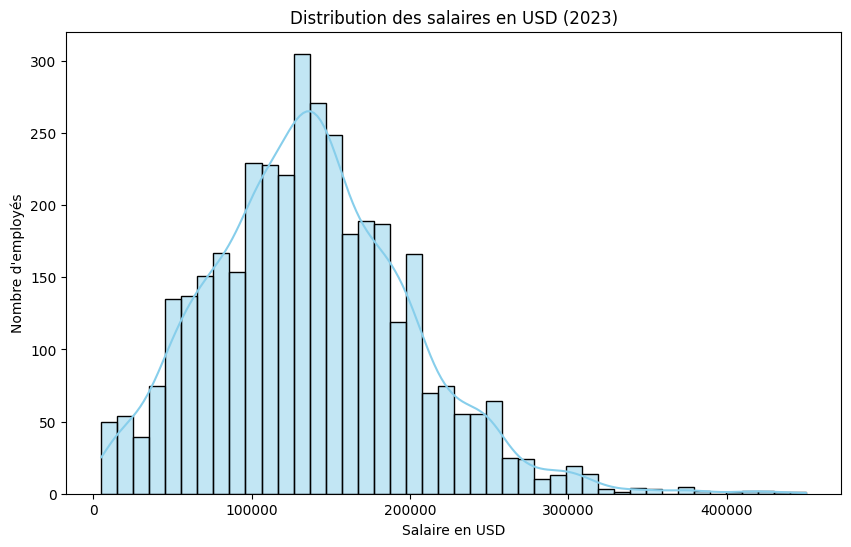

In [7]:
# 2. Distribution des salaires en USD
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='skyblue')
plt.title('Distribution des salaires en USD (2023)')
plt.xlabel('Salaire en USD')
plt.ylabel('Nombre d\'employés')
plt.show()

In [8]:
# 3. Liste des pays concernés (codes ISO)
pays_liste = df['employee_residence'].unique().tolist()
print("\nListe des pays concernés :\n", pays_liste)


Liste des pays concernés :
 ['ES', 'US', 'CA', 'DE', 'GB', 'NG', 'IN', 'HK', 'PT', 'NL', 'CH', 'CF', 'FR', 'AU', 'FI', 'UA', 'IE', 'IL', 'GH', 'AT', 'CO', 'SG', 'SE', 'SI', 'MX', 'UZ', 'BR', 'TH', 'HR', 'PL', 'KW', 'VN', 'CY', 'AR', 'AM', 'BA', 'KE', 'GR', 'MK', 'LV', 'RO', 'PK', 'IT', 'MA', 'LT', 'BE', 'AS', 'IR', 'HU', 'SK', 'CN', 'CZ', 'CR', 'TR', 'CL', 'PR', 'DK', 'BO', 'PH', 'DO', 'EG', 'ID', 'AE', 'MY', 'JP', 'EE', 'HN', 'TN', 'RU', 'DZ', 'IQ', 'BG', 'JE', 'RS', 'NZ', 'MD', 'LU', 'MT']


In [20]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50k-100k
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,<50k
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,<50k
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,150k+
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100k-150k
...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,150k+
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,150k+
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,100k-150k
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,100k-150k


In [ ]:
# 4. Salaires moyens par profession
print("\n--- Salaire moyen par rôle (Top 10) ---")
print(df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head(10))

print("\n--- Salaire moyen par pays (Top 10) ---")
print(df.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10))

print("\n--- Salaire moyen par niveau d'expérience ---")
print(df.groupby('experience_level')['salary_in_usd'].mean())


--- Salaire moyen par rôle (Top 10) ---
job_title
Data Science Tech Lead                375000.000000
Cloud Data Architect                  250000.000000
Data Lead                             212500.000000
Data Analytics Lead                   211254.500000
Principal Data Scientist              198171.125000
Director of Data Science              195140.727273
Principal Data Engineer               192500.000000
Machine Learning Software Engineer    192420.000000
Data Science Manager                  191278.775862
Applied Scientist                     190264.482759
Name: salary_in_usd, dtype: float64

--- Salaire moyen par pays (Top 10) ---
employee_residence
IL    423834.000000
MY    200000.000000
PR    166000.000000
US    152822.011651
CA    132222.905882
CN    125404.000000
NZ    125000.000000
BA    120000.000000
IE    114943.428571
DO    110000.000000
Name: salary_in_usd, dtype: float64

--- Salaire moyen par niveau d'expérience ---
experience_level
EN     78546.284375
EX    194930.

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [10]:
# 1. Filtrer pour un pays donné (ex: US)
df_us = df[df['company_location'] == 'US']
display(df_us.head())

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


In [ ]:
# 2. Top 5 des pays (emplacements d'entreprises) qui paient le plus en moyenne
top_5_pays = df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(5)
print("Top 5 des pays les plus rémunérateurs :\n", top_5_pays)
# peut etre que plutot que de faire un group by il faudrait faire un "ratio" 



Top 5 des pays les plus rémunérateurs :
 company_location
IL    271446.500000
PR    167500.000000
US    151822.009539
RU    140333.333333
CA    131917.689655
NZ    125000.000000
BA    120000.000000
IE    114943.428571
JP    114127.333333
SE    105000.000000
Name: salary_in_usd, dtype: float64


In [ ]:
#Voir si il faut faire attention aux devises monétaires des fichiers par exemple la devise us a plus de poids qu'une devise
# yen ou une autre ,verif

In [12]:
# 3. Filtrage : Salaires > 100 000 USD et proportion télétravail
high_salaries = df[df['salary_in_usd'] > 100000][['job_title', 'salary_in_usd']]
print("\nNombre d'employés gagnant > 100k USD :", high_salaries.shape[0])

remote_100_countries = df[df['remote_ratio'] == 100]['employee_residence'].value_counts()
print("\nPays avec le plus gros volume de télétravail (100%) :\n", remote_100_countries.head(5))


Nombre d'employés gagnant > 100k USD : 2665

Pays avec le plus gros volume de télétravail (100%) :
 employee_residence
US    1302
GB      61
CA      45
IN      39
ES      25
Name: count, dtype: int64


In [13]:
# 4. Requêtes conditionnelles
avg_remote_salary = df[df['remote_ratio'] == 100]['salary_in_usd'].mean()
print(f"\nSalaire moyen en télétravail complet : {avg_remote_salary:.2f} USD")

# Comparaison : Grande (L) vs Petite (S) entreprise
comp_size = df.groupby('company_size')['salary_in_usd'].mean()
print("\nComparaison des salaires par taille d'entreprise :\n", comp_size)


Salaire moyen en télétravail complet : 136481.45 USD

Comparaison des salaires par taille d'entreprise :
 company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [ ]:
# 5. Ajouter une colonne pour les fourchettes de salaires
def salary_bins(salary):
    if salary < 50000: return '<50k'
    elif 50000 <= salary < 100000: return '50k-100k'
    elif 100000 <= salary < 150000: return '100k-150k'
    else: return '150k+'

df['salary_range'] = df['salary_in_usd'].apply(salary_bins)
display(df[['salary_in_usd', 'salary_range']].head(10))




,salary_in_usd,salary_range
0,85847,50k-100k
1,30000,<50k
2,25500,<50k
3,175000,150k+
4,120000,100k-150k
5,222200,150k+
6,136000,100k-150k
7,219000,150k+
8,141000,100k-150k
9,147100,100k-150k



Corrélation entre remote_ratio et salary_in_usd : -0.0642


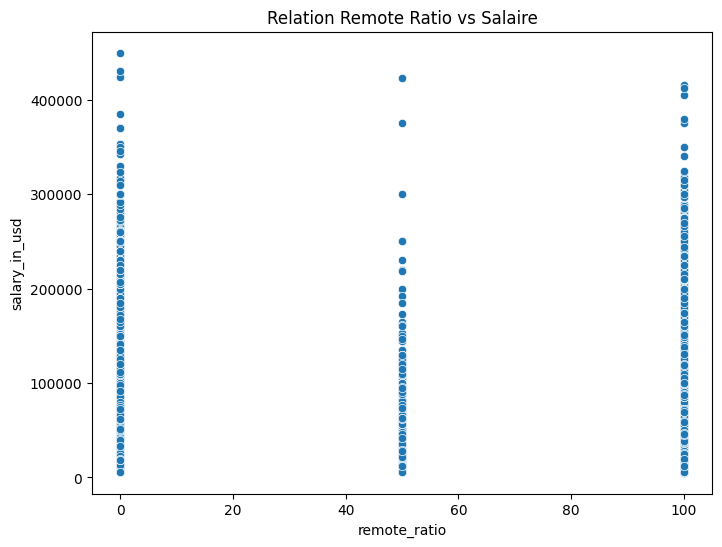

In [15]:
# 6. Corrélation : Relation entre télétravail et salaire
corr = df['remote_ratio'].corr(df['salary_in_usd'])
print(f"\nCorrélation entre remote_ratio et salary_in_usd : {corr:.4f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='remote_ratio', y='salary_in_usd', data=df)
plt.title('Relation Remote Ratio vs Salaire')
plt.show()

In [16]:
# 7. Salaire moyen par taille d'entreprise
print("\nSalaire moyen par taille d'entreprise :\n", df.groupby('company_size')['salary_in_usd'].mean())


Salaire moyen par taille d'entreprise :
 company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64


In [17]:
# 8. Tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level', 
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='mean'
)
print("\nTableau croisé (Expérience vs Télétravail) :\n", pivot_table)


Tableau croisé (Expérience vs Télétravail) :
 remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381


### Partie 3 : Application Streamlit
Dans cette partie, nous allons générer un fichier `application.py` qui contiendra le code pour lancer une application Streamlit interactive.

In [18]:
%%writefile application.py
import streamlit as st
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Chargement des données
@st.cache_data
def load_data():
    return pd.read_csv("ds_salaries.csv")

df = load_data()

st.title("📊 Visualisation des Salaires en Data Science")
st.markdown("Explorez les tendances des salaires à travers différentes visualisations interactives.")

# 2. Exploration visuelle
if st.checkbox("Afficher un aperçu des données"):
    st.write(df.head())

# Statistiques générales
st.subheader("📌 Statistiques générales")
st.write(df.describe())

# 3. Distribution des salaires en France
st.subheader("📈 Distribution des salaires en France")
df_fr = df[df['company_location'] == 'FR']
if not df_fr.empty:
    fig = px.box(df_fr, x='experience_level', y='salary_in_usd', title="Salaires en France par Expérience")
    st.plotly_chart(fig)
else:
    st.write("Pas de données pour la France dans l'échantillon.")

# 4. Tendances de salaires par catégorie
st.subheader("📊 Analyse des tendances de salaires")
cat = st.selectbox("Choisir une catégorie pour la moyenne des salaires", ['experience_level', 'employment_type', 'job_title', 'company_location'])
df_trend = df.groupby(cat)['salary_in_usd'].mean().reset_index()
fig2 = px.bar(df_trend, x=cat, y='salary_in_usd', title=f"Salaire moyen par {cat}")
st.plotly_chart(fig2)

# 5. Corrélations
st.subheader("🔗 Corrélations entre variables numériques")
numeric_df = df.select_dtypes(include=[np.number])
fig3, ax = plt.subplots()
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=ax)
st.pyplot(fig3)

# 6. Evolution pour le Top 10 des postes
st.subheader("🏆 Evolution des Salaires - Top 10 Postes")
top_10_jobs = df['job_title'].value_counts().nlargest(10).index
df_top = df[df['job_title'].isin(top_10_jobs)]
df_line = df_top.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()
fig4 = px.line(df_line, x='work_year', y='salary_in_usd', color='job_title', title="Evolution Salaires Top 10 Jobs")
st.plotly_chart(fig4)

# 7. Salaire Médian par Expérience et Taille
st.subheader("💰 Salaire Médian par Expérience et Taille d'Entreprise")
df_med = df.groupby(['experience_level', 'company_size'])['salary_in_usd'].median().reset_index()
fig5 = px.bar(df_med, x='experience_level', y='salary_in_usd', color='company_size', barmode='group', title="Salaire Médian par Expérience et Taille")
st.plotly_chart(fig5)

# 8. Filtres Dynamiques
st.subheader("🎚️ Filtrer par Salaire")
min_sal = int(df['salary_in_usd'].min())
max_sal = int(df['salary_in_usd'].max())
sal_range = st.slider("Plage de Salaire (USD)", min_sal, max_sal, (min_sal, max_sal))
df_filt = df[(df['salary_in_usd'] >= sal_range[0]) & (df['salary_in_usd'] <= sal_range[1])]
st.write(f"Nombre de résultats correspondants : {len(df_filt)}")

# 9. Impact Télétravail
st.subheader("🏠 Impact du Télétravail")
fig6 = px.box(df, x='remote_ratio', y='salary_in_usd', title="Influence du Télétravail sur le Salaire")
st.plotly_chart(fig6)

# 10. Filtrage Avancé
st.subheader("🔍 Filtrage Multi-Critères")
exp_options = df['experience_level'].unique()
size_options = df['company_size'].unique()

exp_sel = st.multiselect("Sélectionnez le niveau d'expérience", exp_options, default=exp_options)
size_sel = st.multiselect("Sélectionnez la taille d'entreprise", size_options, default=size_options)

df_final = df[(df['experience_level'].isin(exp_sel)) & (df['company_size'].isin(size_sel))]
st.write(f"Résultats filtrés : {len(df_final)} enregistrements")
st.dataframe(df_final)

Overwriting application.py
